### Apr. 19

Non-ramping case
1 kg salt, ususal setup

h1 = h2 = 8 cm
d = 25.5 cm

t = 2min

0.6 V

0.7 V

0.75 V

0.8 V

0.85 V

0.9 V

1 V

1.1 V

1.2 V (resonance? )

1.25 V (resonance)

1.3 V

1.35 V

1.4 V

1.45 V

1.5  V



### Ramping case:


fmin = 0.6 V , fmax = 1.6

5 sec / 0.01 V  1. vid
 
2 sec / 0.01 V 2 . vid

5 sec / 0.01 V 3. vid visszafelé: fmin = 1.8 V fmax = 0.8



density profile at the end of the experiments



In [ ]:
d = [51.7, 51.7, 51.6, 51.1, 50.4, 49.1, 48.8, 45.0, 33.4, 25.3, 9.14, 1.2, 0.9, 0.6, 0.5, 0.5, 0.5, 0.]

In [ ]:
len(d)

In [ ]:
interface_vids = ['reference', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V','16V', 'rampSlow', 'quickRamp']

#### Data analysis

- Each video is 2 minutes long
- split the video to frames (grayscale)
- filter outliers
- Syncronize timeseries
- FT - avg on driving timeseries -> single maximal frequency
- Difference between surface deviation and interface deviation
- FT on this timeseries -> Single maximal amplitude
- Same with interface width

In [354]:
%cd "D:\Interfacial Waves resonance videos 0419"

D:\Interfacial Waves resonance videos 0419


In [355]:
%cd interfaceResponse/

D:\Interfacial Waves resonance videos 0419\interfaceResponse


In [6]:
import cv2
def splitToFrames(src):
    %mkdir $src
    vidcap = cv2.VideoCapture('%s.mp4' %src)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite("%s/frame%d.jpg" %(src,count), image)     # save frame as JPEG file      
        success,image = vidcap.read()
        #print('Read a new frame: ', count )
        count += 1
    print('%s Done \n' %src)
    

In [ ]:
for vid in interface_vids:
    splitToFrames(vid)

In [ ]:
splitToFrames('reference')
splitToFrames('nodriving')

## Loading reference image

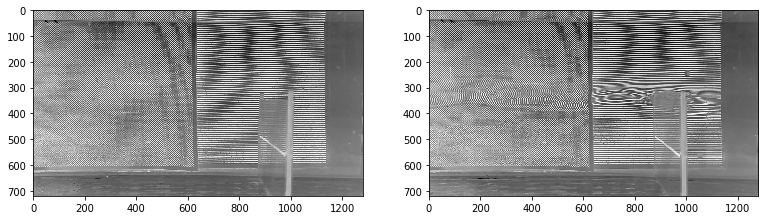

In [286]:
import numpy as np
import matplotlib.pyplot as plt
water = cv2.flip(cv2.imread("reference/frame200.jpg", cv2.IMREAD_GRAYSCALE), -1)
img = cv2.flip(cv2.imread("06V/frame1604.jpg", cv2.IMREAD_GRAYSCALE), -1)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,8))

cv2.equalizeHist(water)
cv2.equalizeHist(img)
ax1.imshow(water, cmap='Greys')
ax2.imshow(img, cmap='Greys')


plt.show()

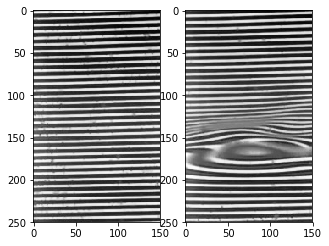

In [342]:
imgcut = img[170:420, 650:800]
refcut = water[150:400, 650:800]
f, (ax1, ax2) = plt.subplots(1,2, figsize=(5,13))
ax1.imshow(refcut, cmap='Greys')
ax2.imshow(imgcut, cmap='Greys')

(250,)
(250, 150)


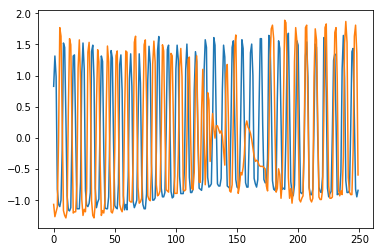

In [343]:
refref = refcut[:, 50]
imgref = imgcut[:, 50]
print(refref.shape)
print(refcut.shape)
plt.plot(normalize(255. - refref))
plt.plot(normalize(255. - imgref))

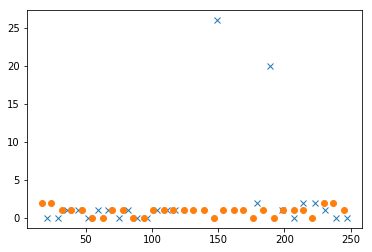

In [349]:


peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.25)
peaks, _ = find_peaks(normalize(255.-refref), height=1.0)

plt.plot(peaksimg[2:], np.abs(np.diff(np.diff(peaksimg))), "x")
plt.plot(peaks[2:], np.abs(np.diff(np.diff(peaks))), "o")

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
refref = refcut[:, 100]
imgref = imgcut[:, 100]

peaksimg, _ = find_peaks(255.-imgref, height=125)
peaks, _ = find_peaks(255.-refref, height=125)

In [350]:
def read_file(src):
    img = cv2.flip(cv2.imread(src, cv2.IMREAD_GRAYSCALE), -1)
    return img

def printMaxAmpl(img, ref, col, loc):
    img = img[100:600, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)
    cv2.equalizeHist(ref)

    imgref = img[:,col]
    refref = ref[:,col]
    signal = np.abs(normalize(255.-imgref) - normalize(255.-refref))
    maxplace = np.argmax(signal)
    return [maxplace, np.max(signal)]

def printMaxAmpl(img, ref, col, loc):
    imgcut = img[170:420, loc[0]:loc[1]]
    #ref = ref[180:550, 600:700]
    cv2.equalizeHist(img)

    imgref = img[:,col]
    refref = ref[:,col]
    peaksimg, _ = find_peaks(normalize(255.-imgref), height=1.25)
    peaks, _ = find_peaks(normalize(255.-refref), height=1)
    shorter =  np.min([len(peaksimg), len(peaks)])
    peaksimgcut = peaksimg[:shorter]
    peakscut = peaks[:shorter]
    maxplace = np.argmax(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))
    return [peaks[maxplace], np.max(np.abs(np.diff(np.diff(peaksimgcut)) - np.diff(np.diff(peakscut))))]



In [2]:
import os


In [352]:
def measureInterfaceSubset(src, subset):

    ampls = []
    ref = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/reference/frame200.jpg" )
    refc = ref[100:600, 650:800]

    for i in subset:
        #print(i)
        img = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, refc,100, [650, 800]))
    return np.array(ampls)


def measureInterface(src):
    ls = os.listdir(src) # list
    number_files = len(ls)

    ampls = []
    for i in range(number_files):
        #print(i)
        img = read_file("%s/frame%s.jpg" %(src,i))
        amplsincol = []
        ampls.append(printMaxAmpl(img, refcut,100, [650, 800]))
    return np.array(ampls)

def saveDataset(src):
    ampls = measureInterface(src)
    np.savetxt("C:/Users/balin/Docs/boSchlieren/data0419/measured/small/%s.txt" %src, ampls)
    print('%s Done \n' %src)

noRampVids = ['06V', '07V', '075V', '08V', '085V', '09V', '1V' , '11V', '12V', '125V', '13V', '135V', '14V', '145V', '15V']

#### Measure interface in the whole region

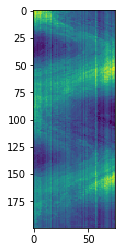

In [330]:
def measureInterfaceSubsetFull(src, subset):

    ampls = []
    ref = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/reference/frame200.jpg" )
    refc = ref[100:600, 650:800]
    
    for i in subset:
        #print(i)
        row = []
        for j in range(150):
            
            img = read_file("D:\Interfacial Waves resonance videos 0419/interfaceResponse/%s/frame%s.jpg" %(src,i))
            amplsincol = []
            row.append(printMaxAmpl(img, refc,j, [650, 800])[0])
        ampls.append(row)
    return np.array(ampls)

test = measureInterfaceSubsetFull('125V', np.arange(1200, 1400, 1))


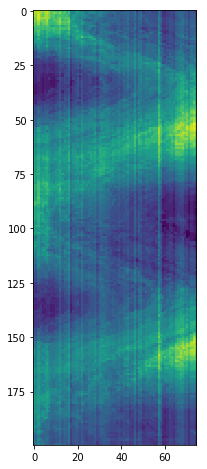

<Figure size 936x360 with 0 Axes>

C:\Users\balin\Docs\boSchlieren\data0419


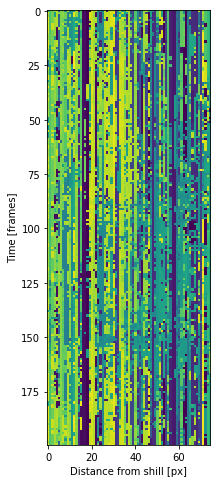

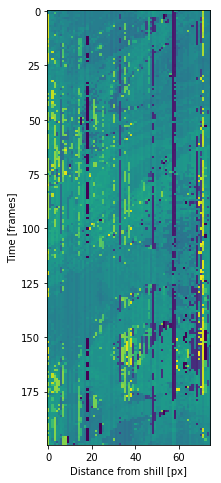

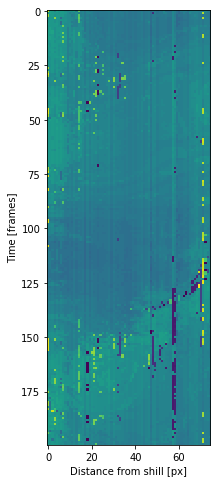

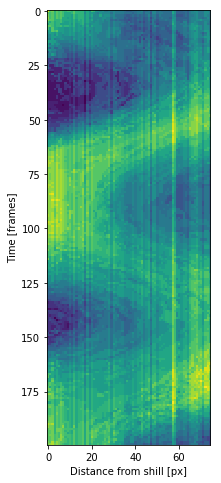

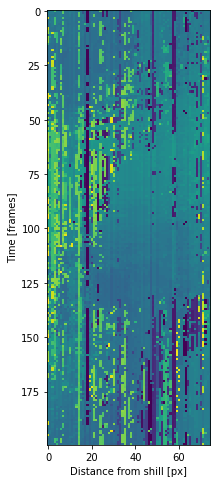

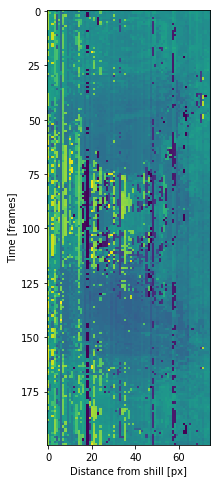

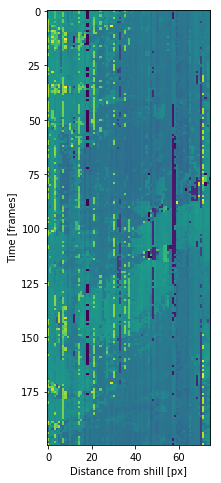

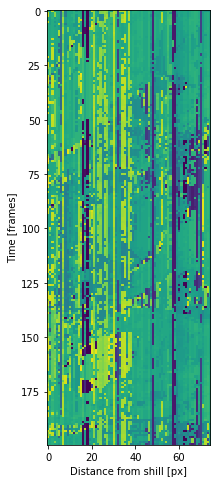

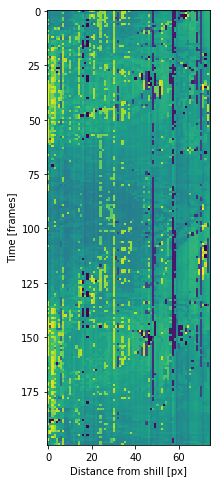

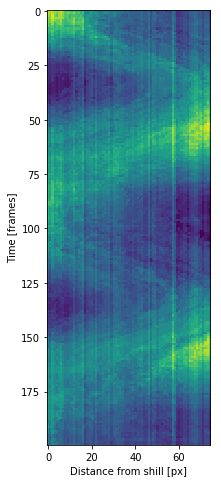

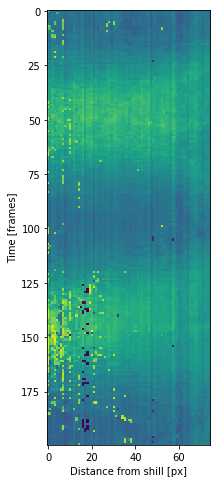

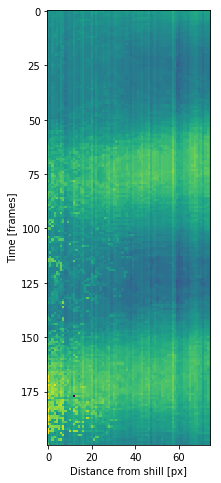

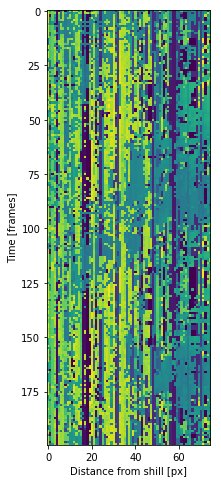

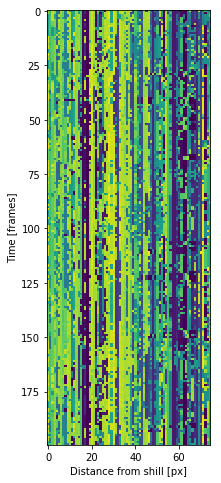

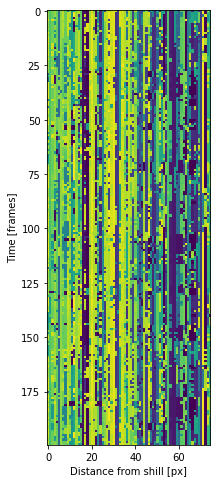

In [335]:

%cd C:\Users/balin/Docs/boSchlieren/data0419
for v in noRampVids:

    test = measureInterfaceSubsetFull(v, np.arange(1200, 1400, 1))
    f = plt.figure(figsize=(5,8))
    plt.imshow(test)
    plt.xlabel('Distance from shill [px]')
    plt.ylabel('Time [frames]')
    plt.savefig('measured/sample/pictures/SpaceTime_%s.png' %v, bbox_inches='tight')

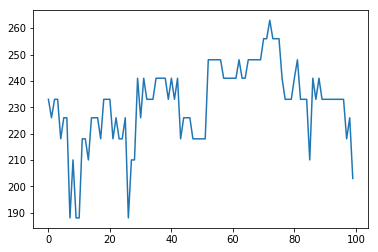

In [305]:
#### Testing  on 09
test = measureInterfaceSubset('07V', np.arange(1300, 1400, 1))
plt.plot(test[:,0])

In [356]:
for v in noRampVids:
    saveDataset(v)

06V Done 

07V Done 

075V Done 

08V Done 

085V Done 

09V Done 

1V Done 

11V Done 

12V Done 

125V Done 

13V Done 

135V Done 

14V Done 

145V Done 

15V Done 



In [336]:
saveDataset('rampSlow')

rampSlow Done 



### Diagnostics


In [129]:
def filterOnce(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)

    divs = np.abs(original-avg)> 3*std
    index = np.arange(0, len(original), 1)
    filtered[index[divs]] = filtered[index[divs]-1]
    #print(np.sum(divs))
    return filtered

def filterUntilSmooth(original):
    filtered = original.copy()
    avg = np.average(original)
    std = np.std(original)
    div = np.abs(original-avg) > 3*std
    while(np.sum(div)>0):
        filtered = filterOnce(filtered)
        avg = np.average(filtered)
        std = np.std(filtered)
        div = np.abs(filtered-avg)> 3*std
    return filtered

def normalize(timeseries):
    avg = np.average(timeseries)
    stdev = np.std(np.abs(timeseries))
    return (timeseries-avg)/stdev

In [357]:
%cd C:\Users/balin/Docs/boSchlieren/data0419
for v in noRampVids:
    plt.clf()
    asd = np.loadtxt('measured/small/%s.txt' %v)
    asd[:,0] = filterUntilSmooth(asd[:,0])
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13,5))
    ax1.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,0],'-o', markersize=0.6)
    ax2.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,0],'-o', markersize=0.6)
    ax3.plot(np.arange(0., asd.shape[0], 1)/29.18, asd[:,1],'-o', markersize=0.6)
    ax2.set_xlabel('Time')
    ax1.set_xlabel('Time')
    ax3.set_xlabel('Time')
    ax1.set_ylabel('Interface position')
    ax2.set_ylabel('Interface position')
    ax3.set_ylabel('Interface width')
    ax2.set_xlim(50., 90.,)
    plt.savefig('measured/sample/pictures/small/%s.png' %v, bbox_inches='tight')
    plt.clf()

C:\Users\balin\Docs\boSchlieren\data0419


<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

In [313]:
%cd C:\Users/balin/Docs/boSchlieren/

from scipy.fftpack import fft,fftfreq
import matplotlib.pyplot as plt
interfacialResponse = []
for v in noRampVids:
    plt.clf()
    asd = filterUntilSmooth(np.loadtxt('data0419/measured/sample/%s.txt' %v)[:,0])
    dt=1./29.18
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
    np_fft = np.fft.fft(asd-np.average(asd))
    n_samples = len(asd)
    T = dt*n_samples
    df = 1./T
    amplitudes = 2./n_samples * np.abs(np_fft) 
    frequencies = np.fft.fftfreq(n_samples) * n_samples*df
    
    ax2.text(0.5, 0.7*np.max(amplitudes), r"Max Amplitude at %s, Amplitude: %s, Period: %s " %(round(frequencies[:len(frequencies)//2][np.argmax(amplitudes)],3), round(np.max(amplitudes), 3), round(1./(frequencies[:len(frequencies)//2][np.argmax(amplitudes)]), 3)))
    ax2.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, n_samples*dt, n_samples), asd, '-o', markersize=1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    plt.savefig('data0419/measured/sample/pictures/fft_%s.png' %v, bbox_inches='tight')
    interfacialResponse.append([frequencies[:len(frequencies)//2][np.argmax(amplitudes)], np.max(amplitudes), np.std(asd)]) ## freq, amplitude, standard dev
    plt.clf()
interfacialResponse = np.array(interfacialResponse)

C:\Users\balin\Docs\boSchlieren


<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

In [80]:
%cd C:Users/balin/Docs/boSchlieren/

C:\Users\balin\Docs\boSchlieren


In [1]:
voltage = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 1., 1.1, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]

In [316]:
freqs=[]
from scipy.fftpack import fft,fftfreq
import matplotlib.pyplot as plt
for v in noRampVids:
    plt.clf()
    asd = np.loadtxt('data0419/timeseries/driving/%s' %v, skiprows=2)
    dt = asd[:,0][1] - asd[:,0][0]
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
    np_fft = np.fft.fft(asd[:,1]-np.average(asd[:,1]))
    n_samples = len(asd)
    T = dt*n_samples
    df = 1./T
    #freqs = np.fft.fftfreq(N)*N*df
    amplitudes = 2./n_samples * np.abs(np_fft) 
    frequencies = np.fft.fftfreq(n_samples) * n_samples*df
    ax2.text(0.5, 0.7*np.max(amplitudes), r"Max Amplitude at %s, Amplitude: %s, Period: %s " %(round(frequencies[:len(frequencies)//2][np.argmax(amplitudes)],3), round(np.max(amplitudes), 3), round(1./(frequencies[:len(frequencies)//2][np.argmax(amplitudes)]), 3)))
    ax2.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, n_samples*dt, n_samples), asd[:,1], '-o', markersize=1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_xlim(30, 40)
    plt.savefig('data0419/timeseries/driving/fft_%s.png' %v, bbox_inches='tight')
    freqs.append(frequencies[:len(frequencies)//2][np.argmax(amplitudes)])
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

Text(0,0.5,'Period [s]')

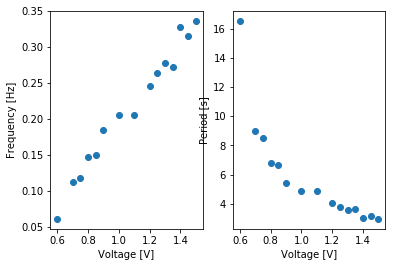

In [110]:
freqs = np.array(freqs)
plt.subplot(121)
plt.plot(voltage, freqs, 'o')
plt.xlabel('Voltage [V]')
plt.ylabel('Frequency [Hz]')
plt.subplot(122)
plt.plot(voltage, 1./freqs, 'o')
plt.xlabel('Voltage [V]')
plt.ylabel('Period [s]')

### Surface response


In [359]:
%cd C:\Users/balin/Docs/boSchlieren/

surface=[]
from scipy.fftpack import fft,fftfreq
import matplotlib.pyplot as plt
for v in noRampVids:
    plt.clf()
    asd = np.loadtxt('data0419/timeseries/surfaceresponse/%s' %v, skiprows=2)
    dt = asd[:,0][1] - asd[:,0][0]
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
    np_fft = np.fft.fft(asd[:,1]-np.average(asd[:,1]))
    n_samples = len(asd)
    T = dt*n_samples
    df = 1./T
    #freqs = np.fft.fftfreq(N)*N*df
    amplitudes = 2./n_samples * np.abs(np_fft) 
    frequencies = np.fft.fftfreq(n_samples) * n_samples*df
    ax2.text(0.5, 0.7*np.max(amplitudes), r"Max Amplitude at %s, Amplitude: %s, Period: %s " %(round(frequencies[:len(frequencies)//2][np.argmax(amplitudes)],3), round(np.max(amplitudes), 3), round(1./(frequencies[:len(frequencies)//2][np.argmax(amplitudes)]), 3)))
    ax2.plot(frequencies[:len(frequencies)//2], amplitudes[:len(np_fft)//2])
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Amplitude')
    ax1.plot(np.linspace(0, n_samples*dt, n_samples), asd[:,1], '-o', markersize=1)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax1.set_xlim(30, 40)
    plt.savefig('data0419/timeseries/surfaceresponse/fft_%s.png' %v, bbox_inches='tight')
    surface.append([frequencies[:len(frequencies)//2][np.argmax(amplitudes)], np.max(amplitudes), np.std(amplitudes)])
    plt.clf()

C:\Users\balin\Docs\boSchlieren


<Figure size 432x288 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

### Amplitude of interfacial waves:

- Maximal FFT component
- Std of timeseries

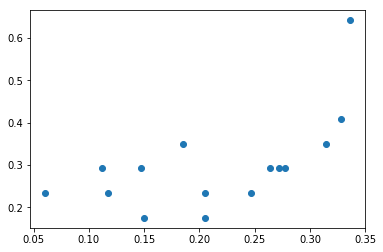

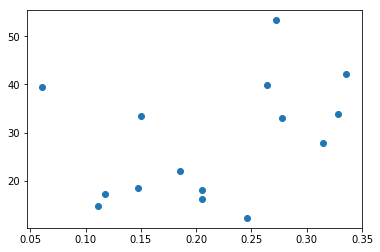

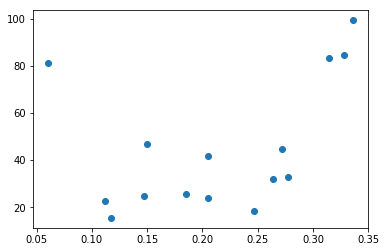

In [326]:
plt.plot(freqs, interfacialResponse[:,0], 'o')
plt.show()
plt.plot(freqs, interfacialResponse[:,1], 'o')
plt.show()
plt.plot(freqs, interfacialResponse[:,2], 'o')
plt.show()

In [362]:
np.savetxt('data0419/measured/frequencies.txt', freqs)
np.savetxt('data0419/measured/interface.txt', interfacialResponse)
np.savetxt('data0419/measured/surface.txt', surface)


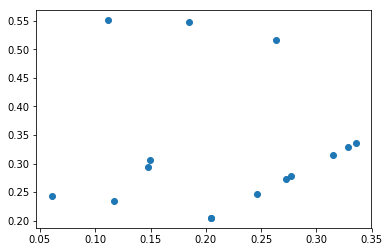

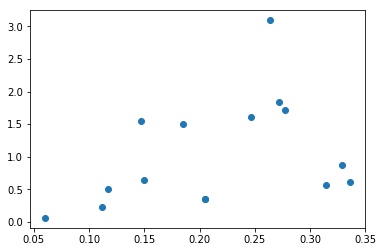

In [360]:
surface = np.array(surface)
plt.plot(freqs, surface[:,0], 'o')
plt.show()
plt.plot(freqs, surface[:,1], 'o')
plt.show()
